In [145]:
# numerical calculation & data frames
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# statistics
import statsmodels.api as sm

# pandas options
pd.set_option('mode.copy_on_write', True)  # pandas 2.0
pd.options.display.float_format = '{:.2f}'.format  # pd.reset_option('display.float_format')
pd.options.display.max_rows = 7  # max number of rows to display

# NumPy options
np.set_printoptions(precision = 2, suppress=True)  # suppress scientific notation

# For high resolution display
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from patsy import dmatrices
from statsmodels.tools.eval_measures import rmse, meanabs

# Build a rangeplot!
def rangeplot(df, x, y, color=None):
    return (
        so.Plot(df, x=x, y=y, color=color)
        .add(so.Range(), so.Est(errorbar=("pi", 50)), so.Dodge())
        .add(so.Dots(pointsize=8, marker="<"), so.Agg("median"), so.Dodge())
        .scale(color="Dark2")
        .theme({**sns.axes_style("whitegrid")})
    )

def boxplot(df, x, y, color=None, alpha=0.1):
    return (
        so.Plot(df, x=x, y=y, color=color)
        .add(so.Dots(alpha=alpha, color=".6"), so.Jitter(), so.Dodge())
        .add(so.Range(), so.Est(errorbar=("pi", 50)), so.Dodge())
        .add(so.Dots(pointsize=8, marker="<"), so.Agg("median"), so.Dodge())
        .scale(color="Dark2")
        .theme({**sns.axes_style("whitegrid")})
    )

총점 250

### A-1. (5)

In [146]:
houses = sm.datasets.get_rdataset("SaratogaHouses", "mosaicData").data

# 변수 설명
# print(sm.datasets.get_rdataset("SaratogaHouses", "mosaicData").__doc__)

In [147]:
houses = houses.loc[(houses.age <= 100) & (houses.bathrooms > 0) & (houses.bathrooms < 4)]

houses

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,132500,0.09,42,50000,906,35,2,1,1.00,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.50,6,hot water/steam,gas,septic,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.50,5,hot air,gas,septic,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,194900,0.39,9,20400,1099,51,2,0,1.00,3,hot air,gas,public/commercial,No,No,No
1726,125000,0.24,48,16800,1225,51,3,1,1.00,7,hot air,gas,public/commercial,No,No,No
1727,111300,0.59,86,26000,1959,51,3,0,1.00,6,hot air,gas,septic,No,No,No


### A-2. (20)

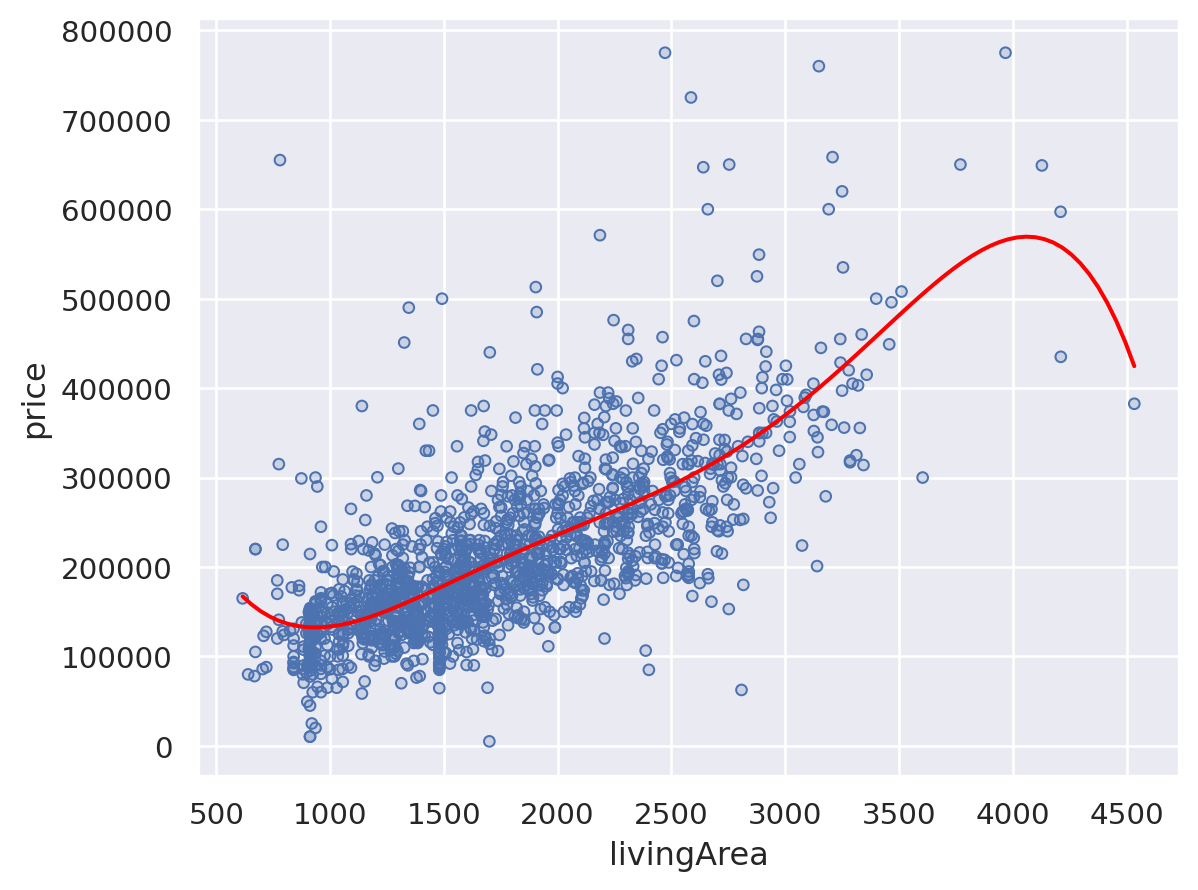

In [148]:
# a
(
    so.Plot(houses, x = 'livingArea', y = 'price')
    .add(so.Dots())
    .add(so.Line(color = 'red'), so.PolyFit(5))
)

In [149]:
# b
mod = ols('price ~ livingArea', data=houses).fit()

In [150]:
# c.
mod.params
# 100이 늘면 114.21 * 100 = $11421가 늘어난다.

Intercept    12106.02
livingArea     114.21
dtype: float64

In [151]:
# d.

r_squared = mod.rsquared

print("R-squared:", "{:.2f}".format(r_squared))

# 51퍼 설명한다.

R-squared: 0.51


### A-3. (10)

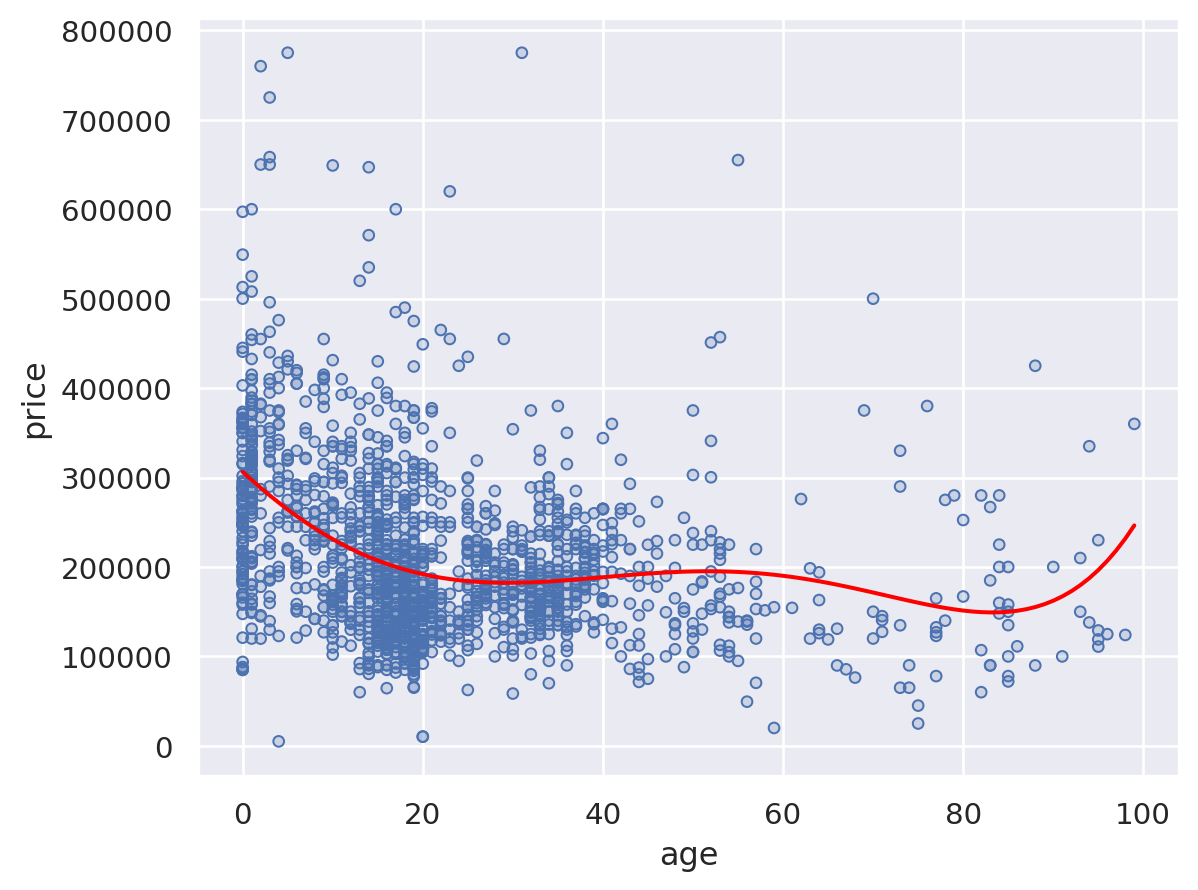

In [152]:
# a.
(
    so.Plot(houses, x = 'age', y = 'price')
    .add(so.Dots())
    .add(so.Line(color = 'red'), so.PolyFit(5))
)


b. 대략적인 경향성을 기술하고, 선형관계로 모형을 만드는 것이 적절한지 기술해보세요.

A) 선형적인 특성을 가지고 있지 않다. 선형관계로 모델을 만드는 것은 적합하지 않다.

### A-4. (20)

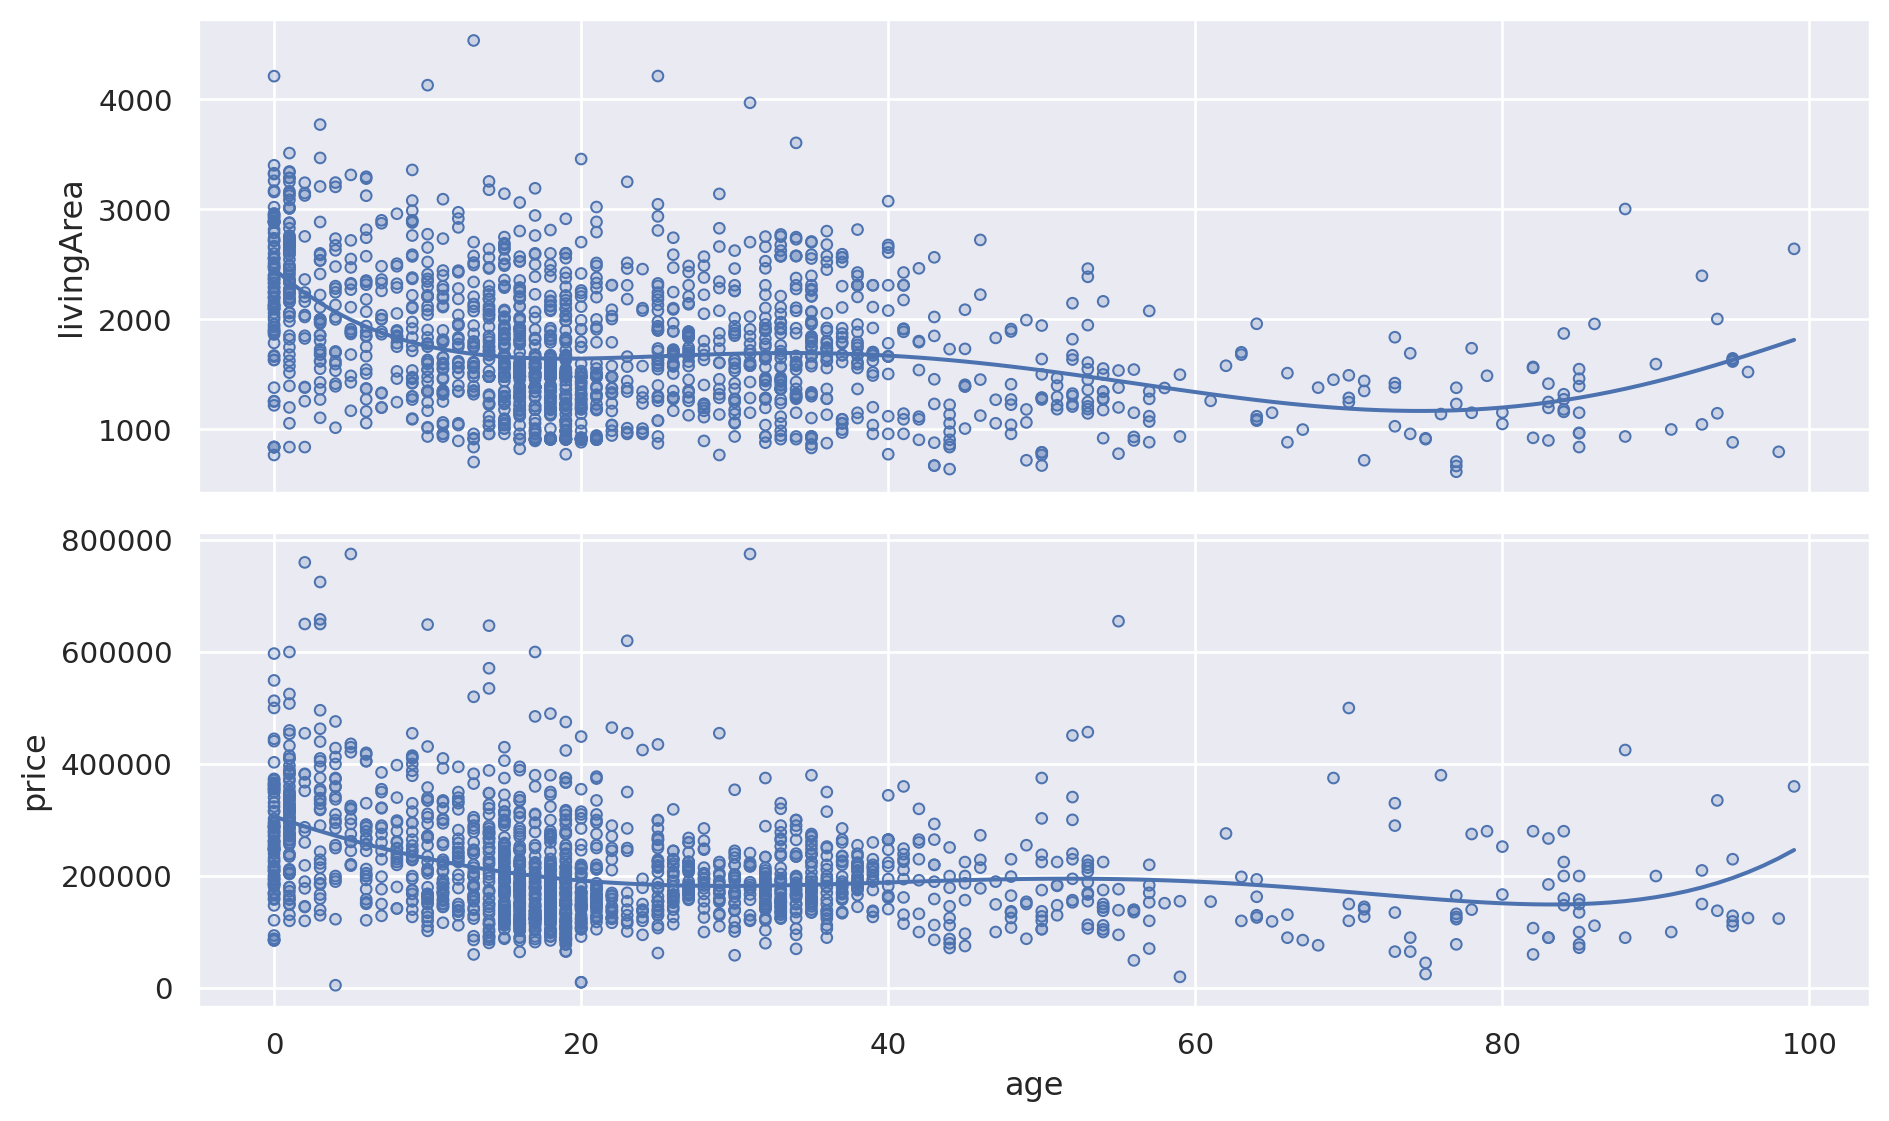

In [153]:
# a.

(
    so.Plot(houses, x ='age')
    .pair(y = ['livingArea', 'price'])
    .add(so.Dots())
    .add(so.Line(), so.PolyFit(5))
    .layout(size=(10, 6))

)


b. 이 플랏을 보고, 오래된 집의 가격이 낮아지는 현상에 대한 가능한 설명을 기술해보세요.

A) 오래된 집에서의 price와 livingAra를 보면 유사한 양상으로 볼 수 있는데, 오래된 집으로 livingArea가 작고, 면적은 작을수록 price를 낮추기 때문에 가격이 낮아지는 경향이 있을 수 있다. 오래된 집들의 거주공간이 작은 경향이 있어, 간접적으로 집값이 낮아보이는 것.


### A-5. (20)

In [154]:
import statsmodels.formula.api as smf

mod1 = smf.ols('price ~ livingArea', data = houses).fit()
mod2 = smf.ols('price ~ age', data = houses).fit()
mod3 = smf.ols('price ~ livingArea + age', data = houses).fit()

In [155]:
print(mod1.params)
print(mod2.params)
print(mod3.params)

Intercept    12106.02
livingArea     114.21
dtype: float64
Intercept   245594.16
age          -1488.76
dtype: float64
Intercept    26193.59
livingArea     110.90
age           -363.41
dtype: float64


In [156]:
# a.
# mod2에서는 1년 늘면 1488.76 떨어지는데, mod3에서는 363.41만큼 떨어진다.

In [157]:
# b.
# mod1에서는 114.21만큼 늘어나는데, mod3에서는 110.90만큼 올라간다.

c. 왜 이런 변화가 생겼을지 앞서 알아본 (A-1) ~ (A-4)의 내용과 옆 도식을 참고해서 간단히 설명해보세요.

A) 거주공간의 넓이와 집의 연령은 깊이 연관되어 있으며, 두 변수의 redunancy가 각 변수들의 효과를 변화시킴. 거주 공간의 넓이가 늘더라도, 집의 연령으로 인해 발생하는 마이너스 효과가 더해져서 이런 변화가 발생한다.

### A-6. (15)

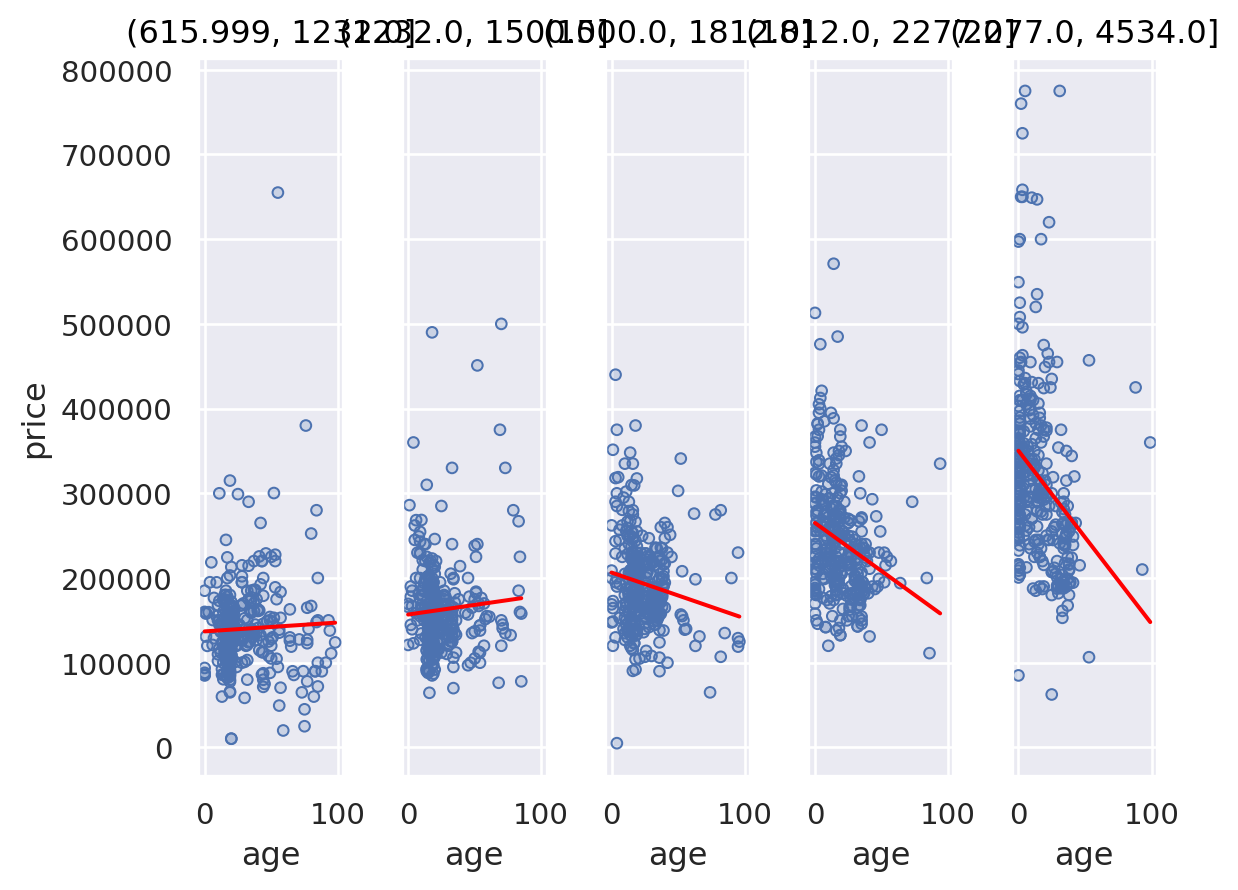

In [158]:

houses["livingArea_quantiles"] = pd.qcut(houses["livingArea"], 5)

(
    so.Plot(houses, x = 'age', y = 'price')
    .add(so.Dots())
    .add(so.Line(color = 'red'), so.PolyFit(1))
    .facet(col = 'livingArea_quantiles')
)


### A-7. (20)

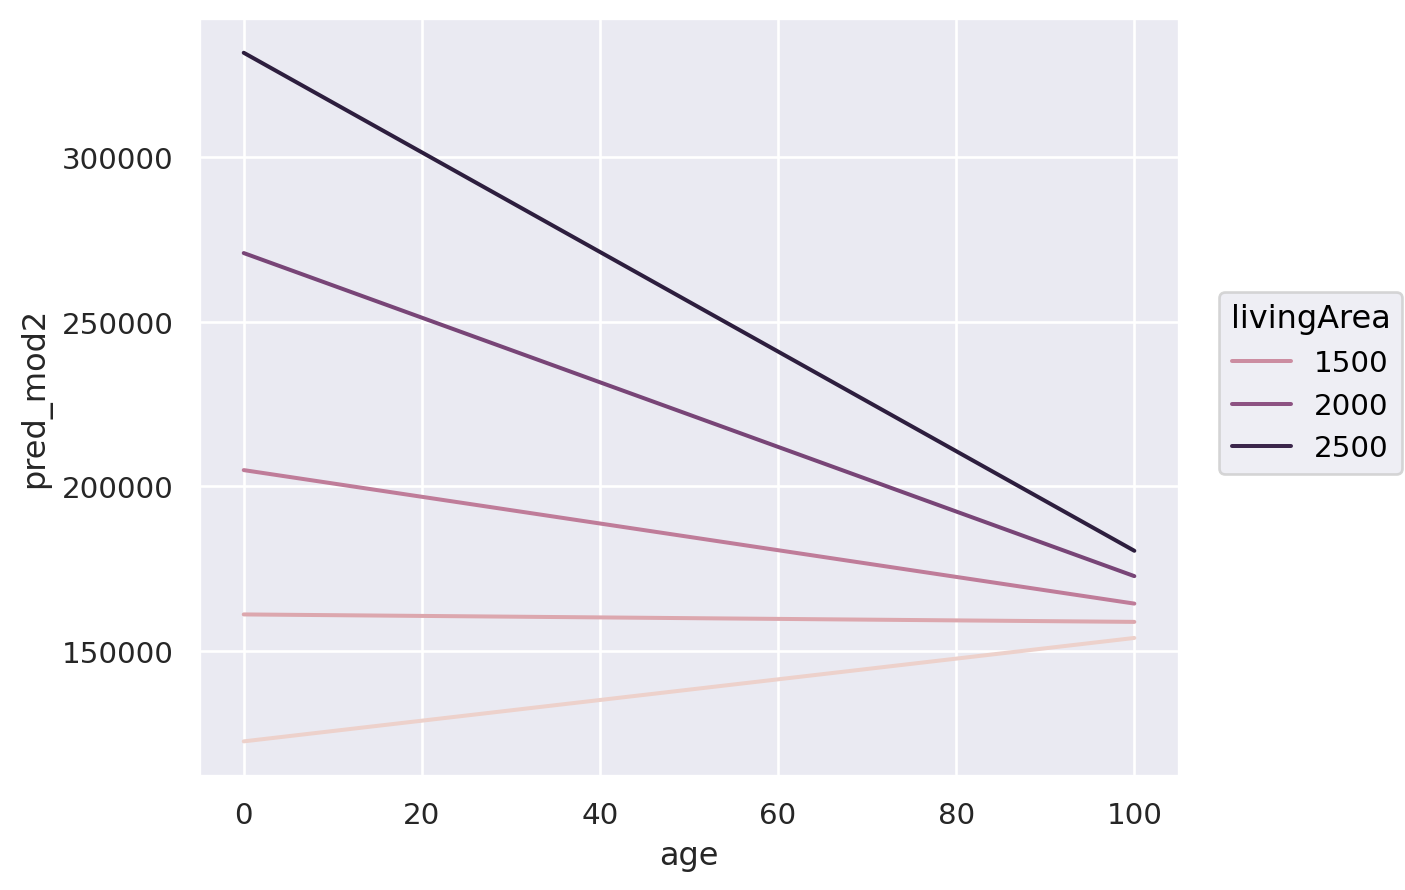

In [159]:
#  a.

mod3 = smf.ols('price ~ livingArea * age', data = houses).fit()

# age: 0년에서 100년까지 1년 단위로
age = np.arange(0, 101)

# 거주공간의 넓이: 분포에서 10%, 25%, 50%, 75%, 90% 지점의 값들
livingArea = np.quantile(houses["livingArea"], [0.10, 0.25, 0.50, 0.75, 0.90])

from itertools import product
grid = pd.DataFrame(
    list(product(age, livingArea)),
    columns=["age", "livingArea"],
)

grid["pred_mod2"] = mod3.predict(grid[["age", "livingArea"]])


(
    so.Plot(grid, x = 'age', y = 'pred_mod2', color = 'livingArea')
    .add(so.Line())
)

오래된 집일수록 집값이 낮아보였던 처음의 관찰에 대해 어떻게 해석할 수 있을지 간략히 설명해보세요.

A) 실제로 오래된 집일수록 집값이 낮아진다. 집의 면적이 크면 시작점 즉, 집값은 오르나, 연식이 오래될수록 가격이 떨어지는 걸 위의 plot을 보고 알 수 있다.

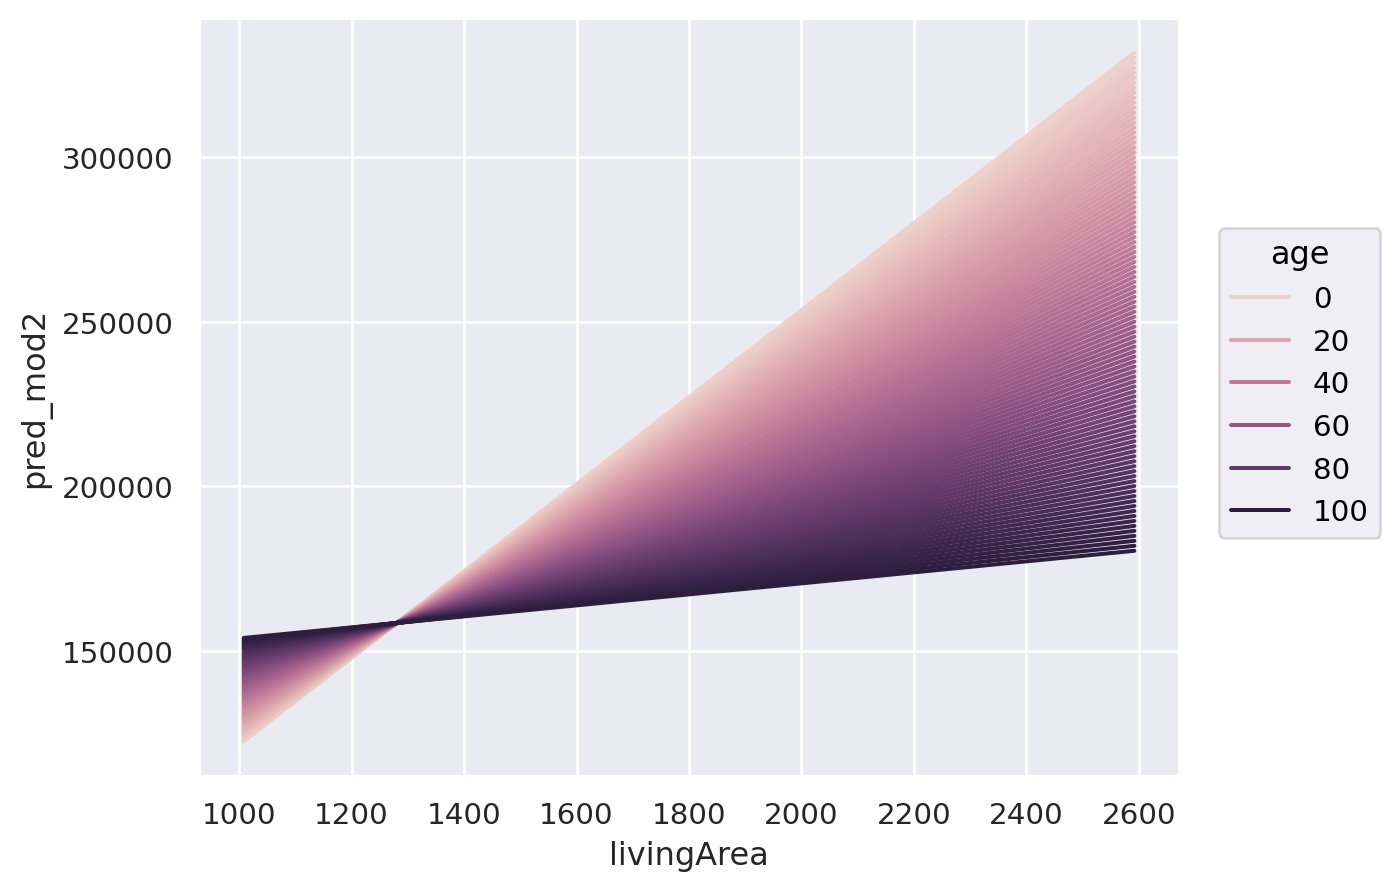

In [160]:
# b.
(
    so.Plot(grid, x = 'livingArea', y = 'pred_mod2', color = 'age')
    .add(so.Line())
)

거주공간이 넓어질수록 가격이 높아지는 경향이 집의 연식에 따라 어떻게 달라질 수 있는지 간략히 기술해보세요.

A) 집의 연식이 낮을수록, 즉 새로 만들어진 것들이 거주공간이 넓고, 이는 가격이 높아지는 경향을 만든다.반대로 오래된 집들의 거주공간이 작은 경향이 있어, 간접적으로 집값이 낮아보이는 것.

### A-8. (20)

In [161]:
# a.
houses["resid"] = mod3.resid

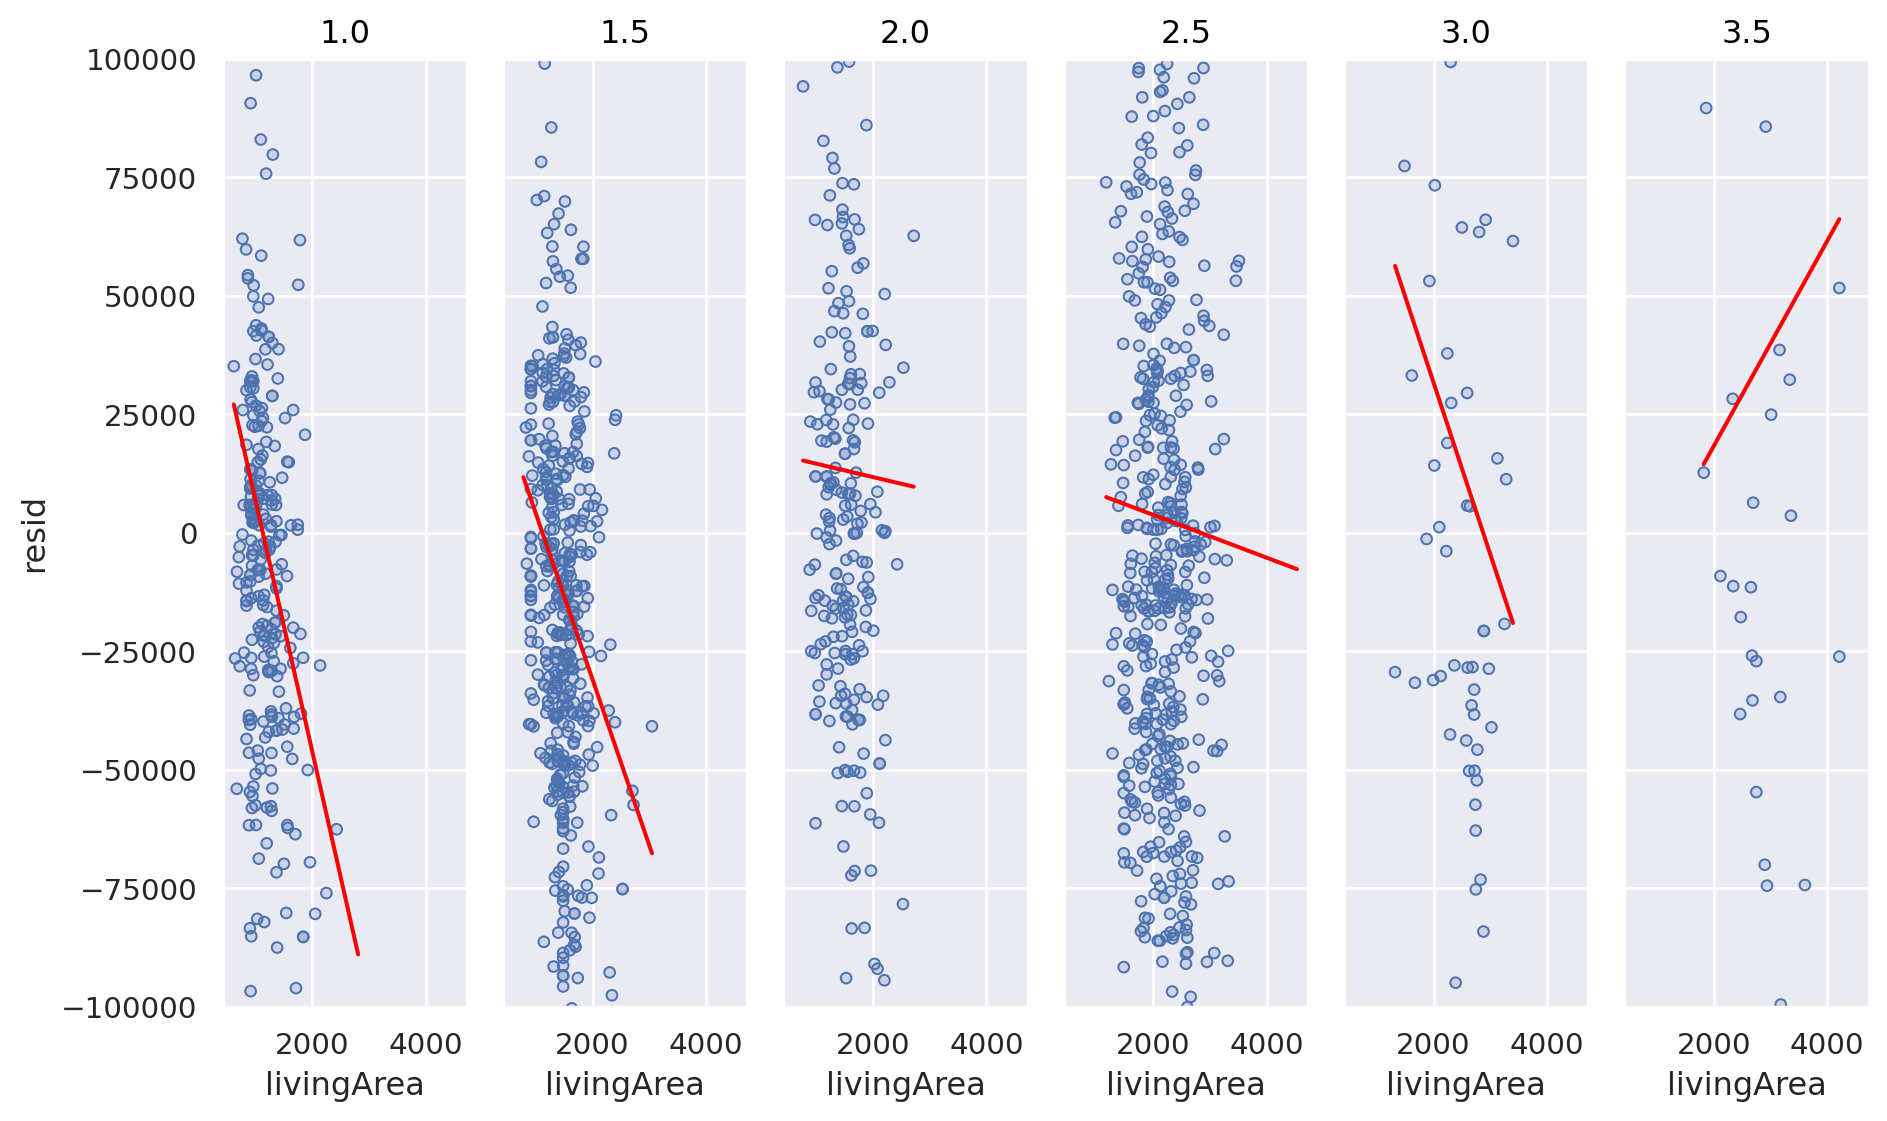

In [162]:
# b.
(
    so.Plot(houses, x = 'livingArea', y = 'resid')
    .add(so.Dots())
    .add(so.Line(color = 'red'), so.PolyFit(1))
    .facet(col = 'bathrooms')
    .limit(y=(-100000, 100000))
    .layout(size=(10, 6))
)

c. 욕실의 수가 적을 때를 중심으로 아래 플랏이 암시하는 바를 기술해보세요.
Y축은 거주공간의 넓이(`livingArea`)가 이미 residualized된 집값(`resid`)임을 고려하세요.

A) 욕실의 수가 늘어날 때, 거주공간의 넓이가 점차 넓어지는 걸 확인할 수 있다. bathroom이 1일 때 왼쪽에 분포되어 있는 그래프가 bathroom이 커지면 점차 오른쪽으로 분포가 옮겨지는 것을 확인할 수 있다. 이는 면적이 넓으면 욕실의 수도 늘어난다는 걸 보여주고 있다.

### B-1. (10)

A) casual 사용자는 자전거를 등록해서 사용하는 게 아닌 주말에 나들이나 여가 생활로 즐기시는 분들의 집단, registered 사용자는 자전거를 등록해서 사용하는, 출퇴근이나 정기적으로 평일에 일을 나가야만 하는 분들의 집단이다.

### B-2. (10)

 A) 9월에서 11월에는 온도로는 예측되지 않는, 즉 같은 온도라고 해도 자전거를 특별히 더 대여하게 되는 특성이 있을 수 있음. 반대로, 2~4월에는 온도로는 예측되지 않는 자전거를 특별히 더 적게 대여하게 되는 특성이 있을 수 있음. 즉, 온도로 만든 모델이 설명해주지 못한 것으로 달(month)이 설명해주는 게 있다고 해석할 수 있음.

### B-3. (10)

A) 값이 퍼져서 배치되는 걸 로그를 취하면 막을 수 있고, log 변환시켜주면 분포가 더 분석하기 좋게 나이스하게 변한다.

### B-4. (10)

In [163]:
bikes = pd.read_csv("data/hour.csv")
bikes_daily = pd.read_csv("data/day.csv")

def clean_data(df):
    df.rename({"dteday": "date", "cnt": "count"}, axis=1, inplace=True)

    df = df.assign(
        date=lambda x: pd.to_datetime(x["date"]),  # datetime type으로 변환
        year=lambda x: x["date"].dt.year.astype(str),  # year 추출
        day=lambda x: x["date"].dt.day_of_year,  # day of the year 추출
        month=lambda x: x["date"].dt.month_name().str[:3],  # month 추출
        wday=lambda x: x["date"].dt.day_name().str[:3],  # 요일 추출
    )

    return df

bikes = clean_data(bikes)  # hourly data
bikes_daily = clean_data(bikes_daily)  # daily data

bikes = (
    bikes.query('year == "2012"')  # 2012년 데이터만 사용
    .assign(
        lregistered = np.log2(bikes["registered"] + 1),  # log2 변환
        lcasual = np.log2(bikes["casual"] + 1),          # log2 변환
    )
)

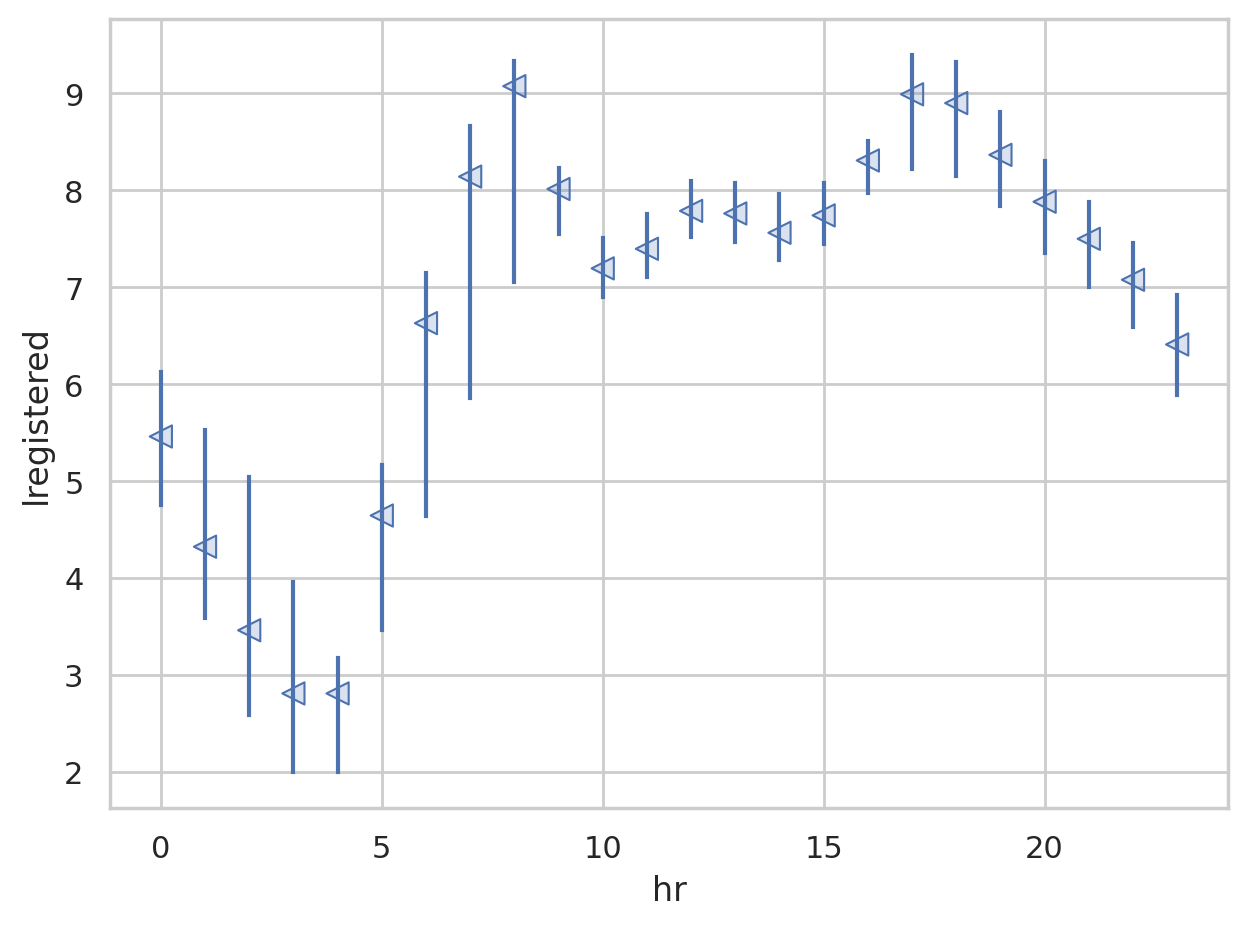

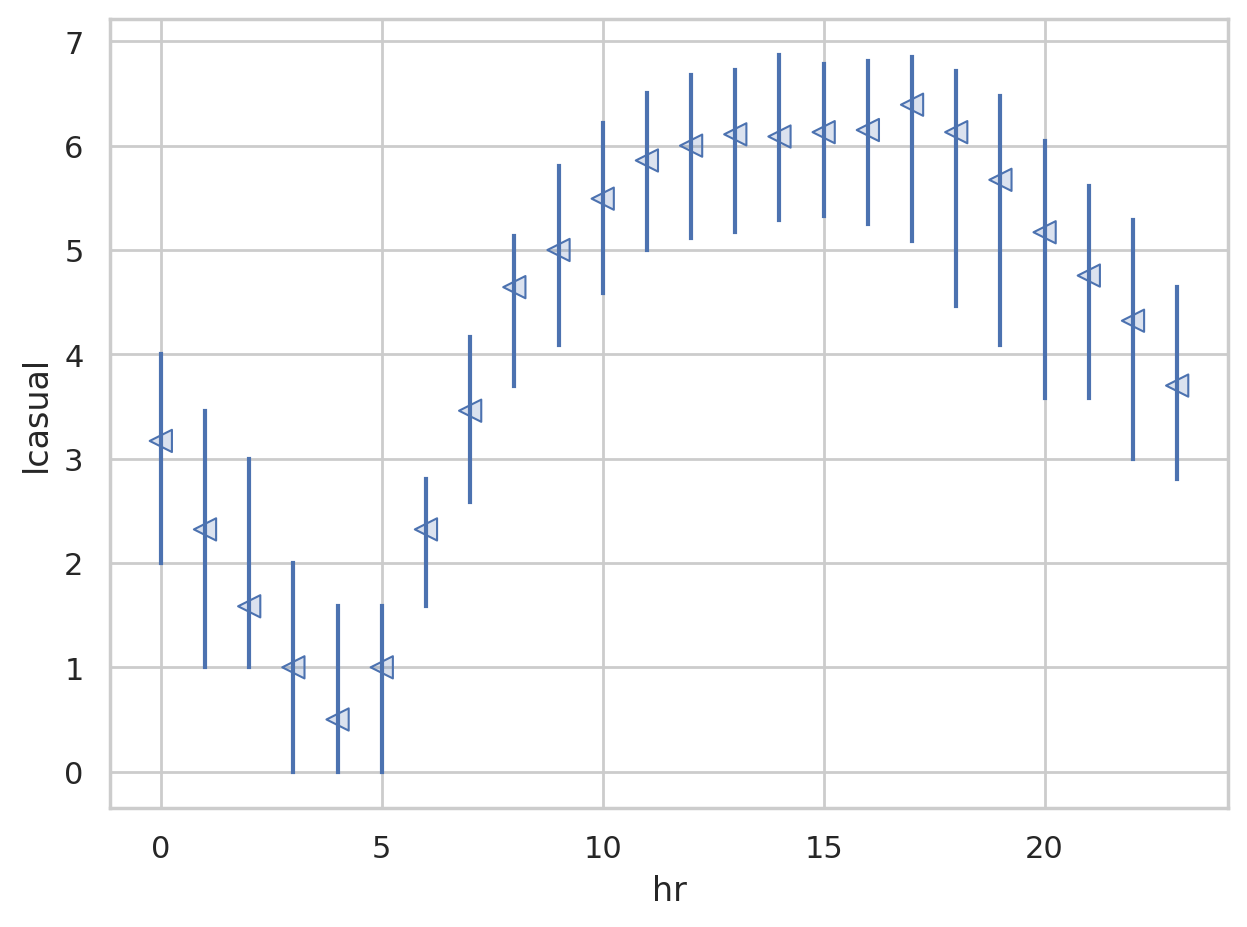

In [164]:
# a.
rangeplot(bikes, "hr", "lregistered").show()
rangeplot(bikes, "hr", "lcasual").show()

b. 이 두 그룹을 따로 분석해야 하는지에 대해 간단히 기술해보세요.

A) 하루의 시간에 따라 변하는 것을 봤는데, 이는 registered는 출퇴근 시간에 자전거 사용량이 높고, casual은 여가 활동 시간인 낮 시간에 사용량이 많은 것을 보아 따로 분석을 진행해야 한다.

### B-5. (10)

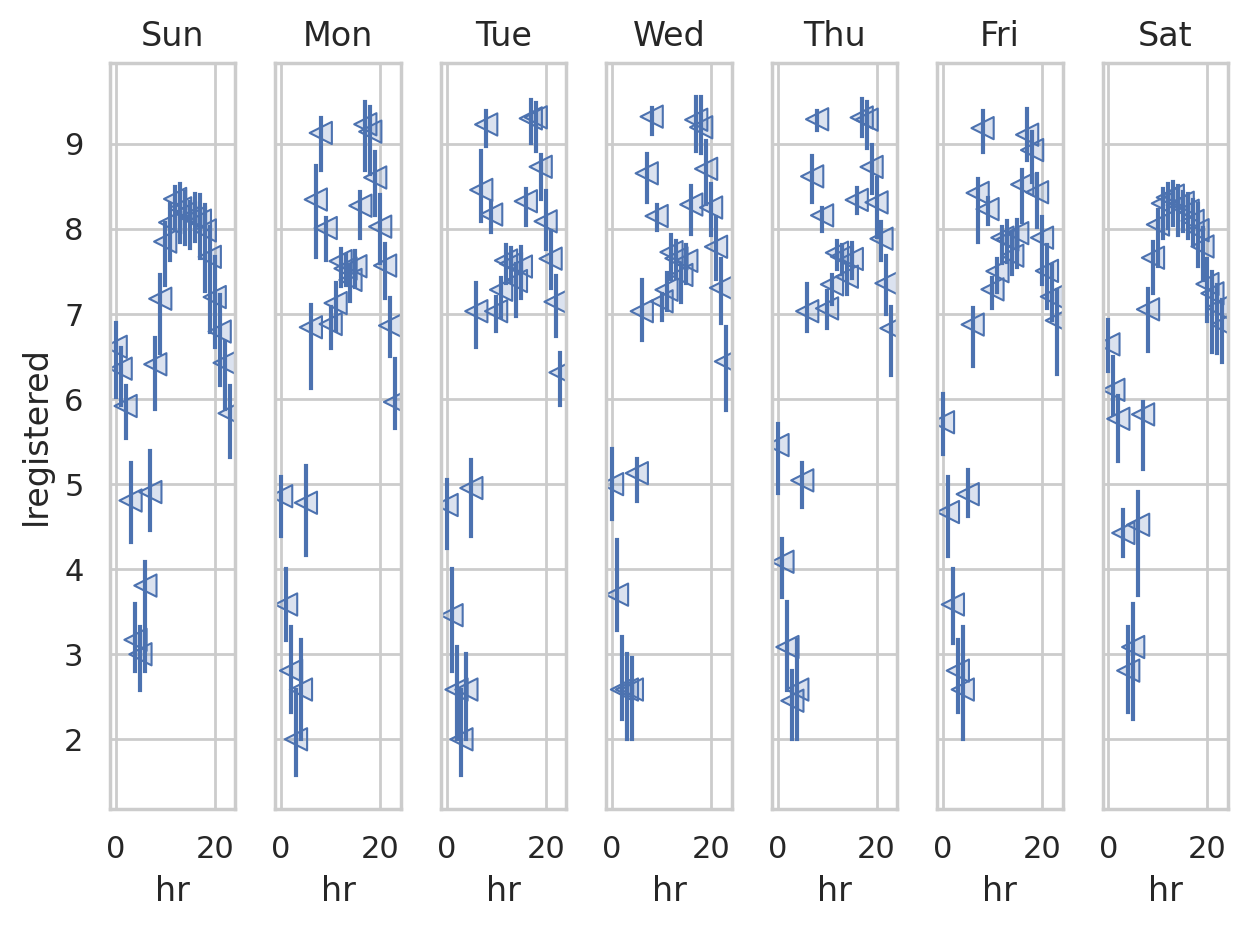

In [165]:
# a.
rangeplot(bikes, "hr", "lregistered").facet(col="wday").show()

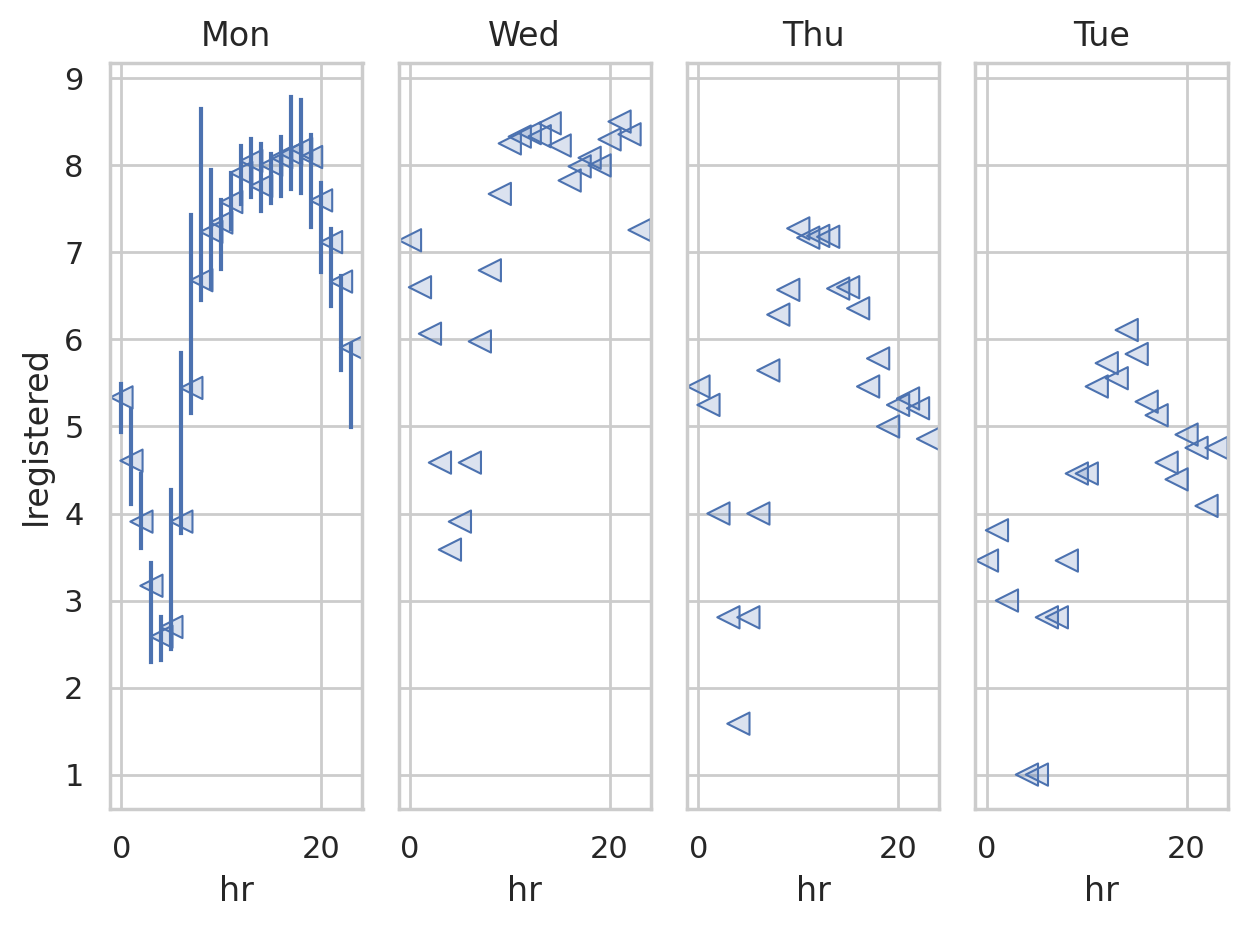

In [166]:
# b.

rangeplot(bikes.query('holiday == 1'), x= 'hr', y = 'lregistered').facet(col="wday").show()

### B-6. (15)

In [167]:
# a.
bikes['workingday'] = bikes['workingday'].apply(lambda x: 'workday' if x == 1 else 'day off')
bikes

,instant,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,windspeed,casual,registered,count,year,day,month,wday,lregistered,lcasual
8645,8646,2012-01-01,1,1,1,0,0,0,day off,1,...,0.00,5,43,48,2012,1,Jan,Sun,5.46,2.58
8646,8647,2012-01-01,1,1,1,1,0,0,day off,1,...,0.13,15,78,93,2012,1,Jan,Sun,6.30,4.00
8647,8648,2012-01-01,1,1,1,2,0,0,day off,1,...,0.00,16,59,75,2012,1,Jan,Sun,5.91,4.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17376,17377,2012-12-31,1,1,12,21,0,1,workday,1,...,0.16,7,83,90,2012,366,Dec,Mon,6.39,3.00
17377,17378,2012-12-31,1,1,12,22,0,1,workday,1,...,0.13,13,48,61,2012,366,Dec,Mon,5.61,3.81
17378,17379,2012-12-31,1,1,12,23,0,1,workday,1,...,0.13,12,37,49,2012,366,Dec,Mon,5.25,3.70


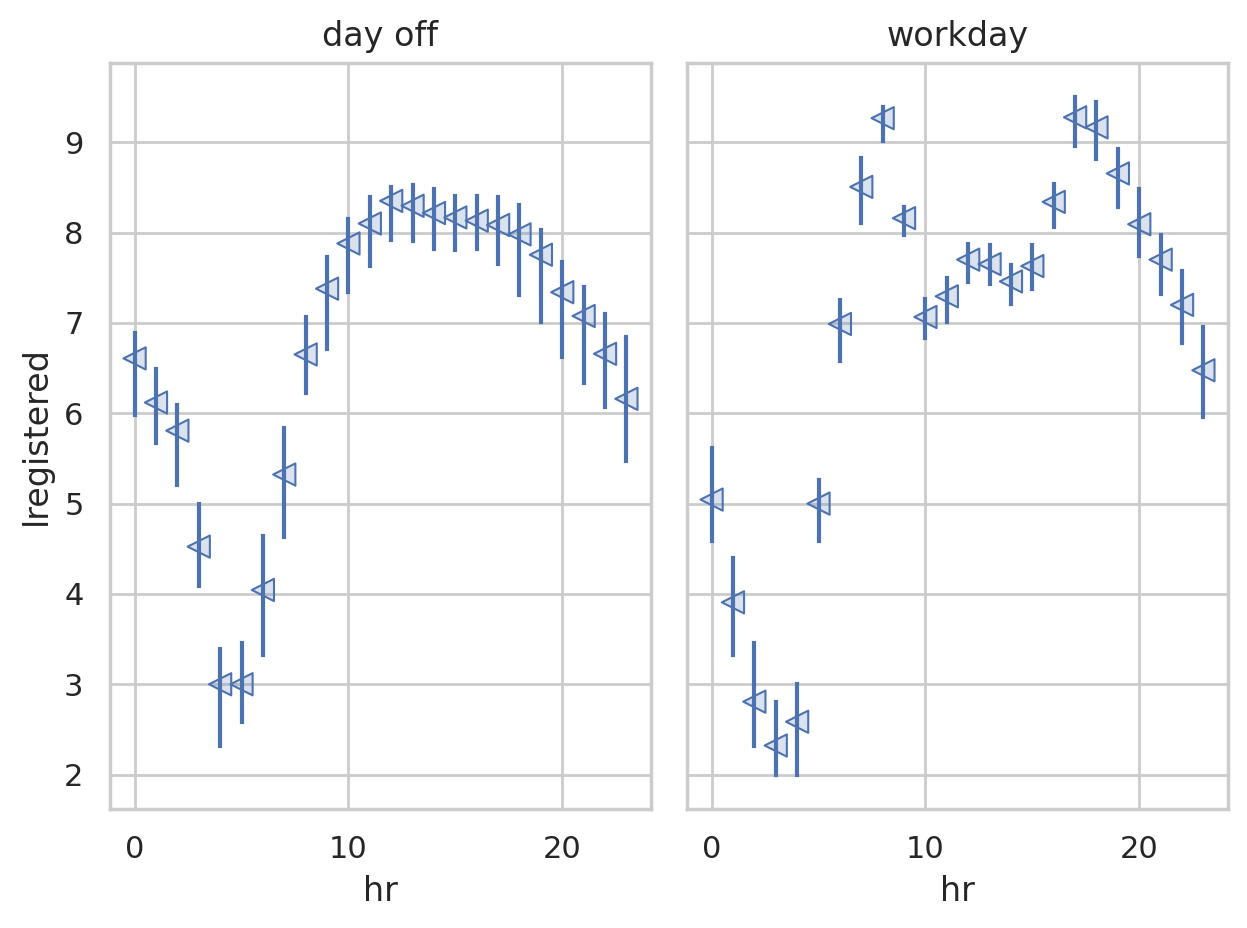

In [168]:
# b.
rangeplot(bikes, x = 'hr', y = 'lregistered').facet('workingday').show()

c. 두드러진 특징을 간략히 기술하고, 왜 이런 패턴이 나타날지 대략 추측해보세요.

A) day off일 때는 활동 시간인 낮 시간대에 많이 자전거를 탄다는 걸 볼 수 있고, working day 떄는 출퇴근 시간에 자전거를 많이 탄다는 걸 볼 수 있다. 당연히 일을 하고 안 하고가 이 패턴이 나타나는 것에 주요 원인이라고 판단된다.

### B-7. (10)

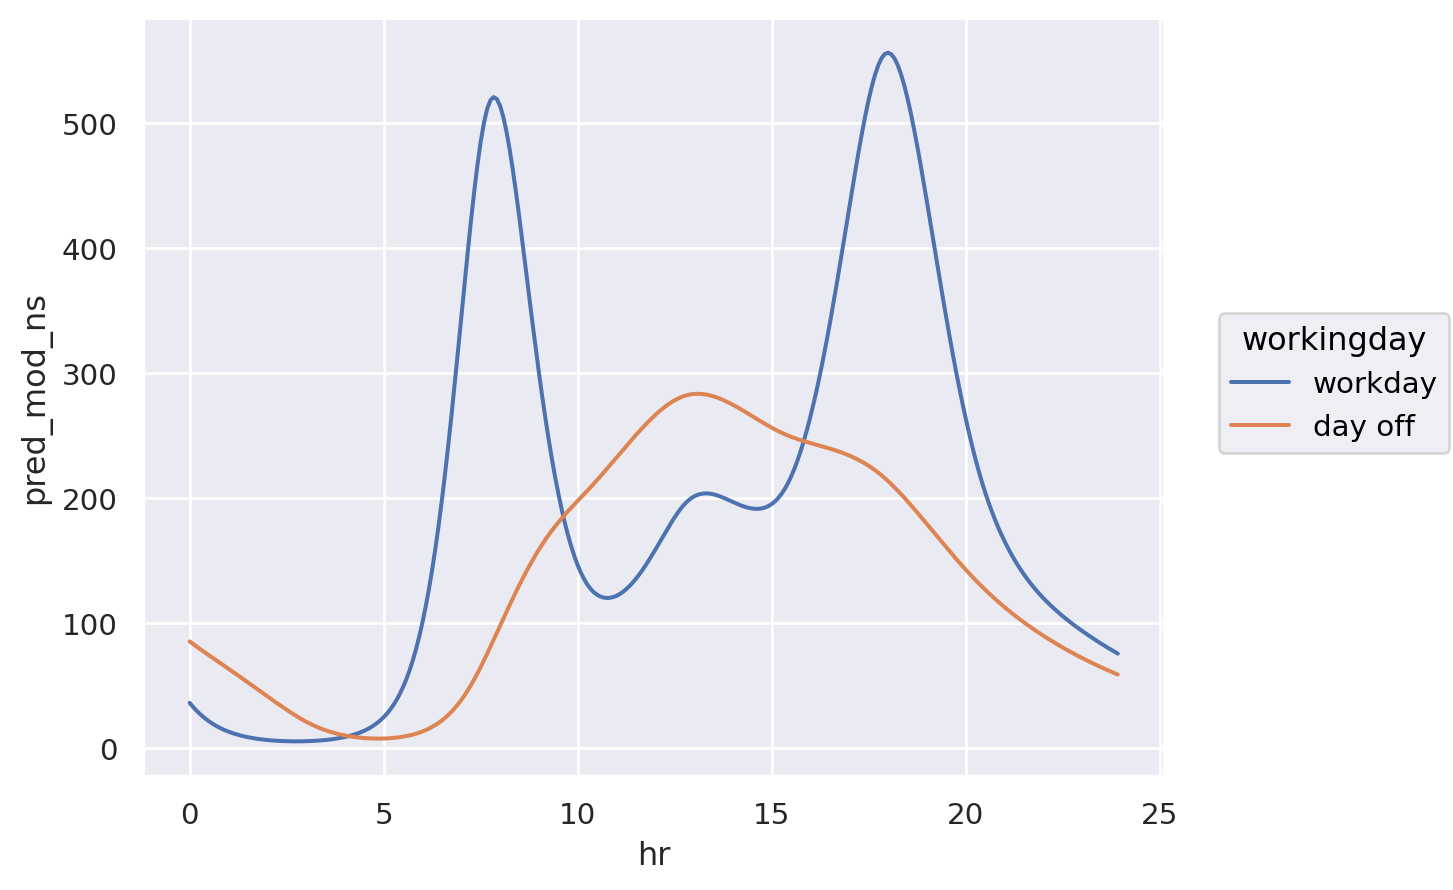

In [169]:
mod_ns = smf.ols("lregistered ~ cr(hr, df=10) * workingday", data=bikes).fit()


hr = np.arange(0, 24, 5/60)  # 5분 단위로 24시간
workingday = ["workday", "day off"]  # 근무일, 휴일

from itertools import product
grid = pd.DataFrame(
    list(product(hr, workingday)),
    columns=["hr", "workingday"],
)

grid["l_pred_mod_ns"] = mod_ns.predict(grid[["hr", "workingday"]])
grid["pred_mod_ns"] = 2**grid.l_pred_mod_ns  # 원래 단위인 price로 되돌리기

(
    so.Plot(grid, x = 'hr', y = 'pred_mod_ns', color = 'workingday')
    .add(so.Line())
)

### B-8. (10)

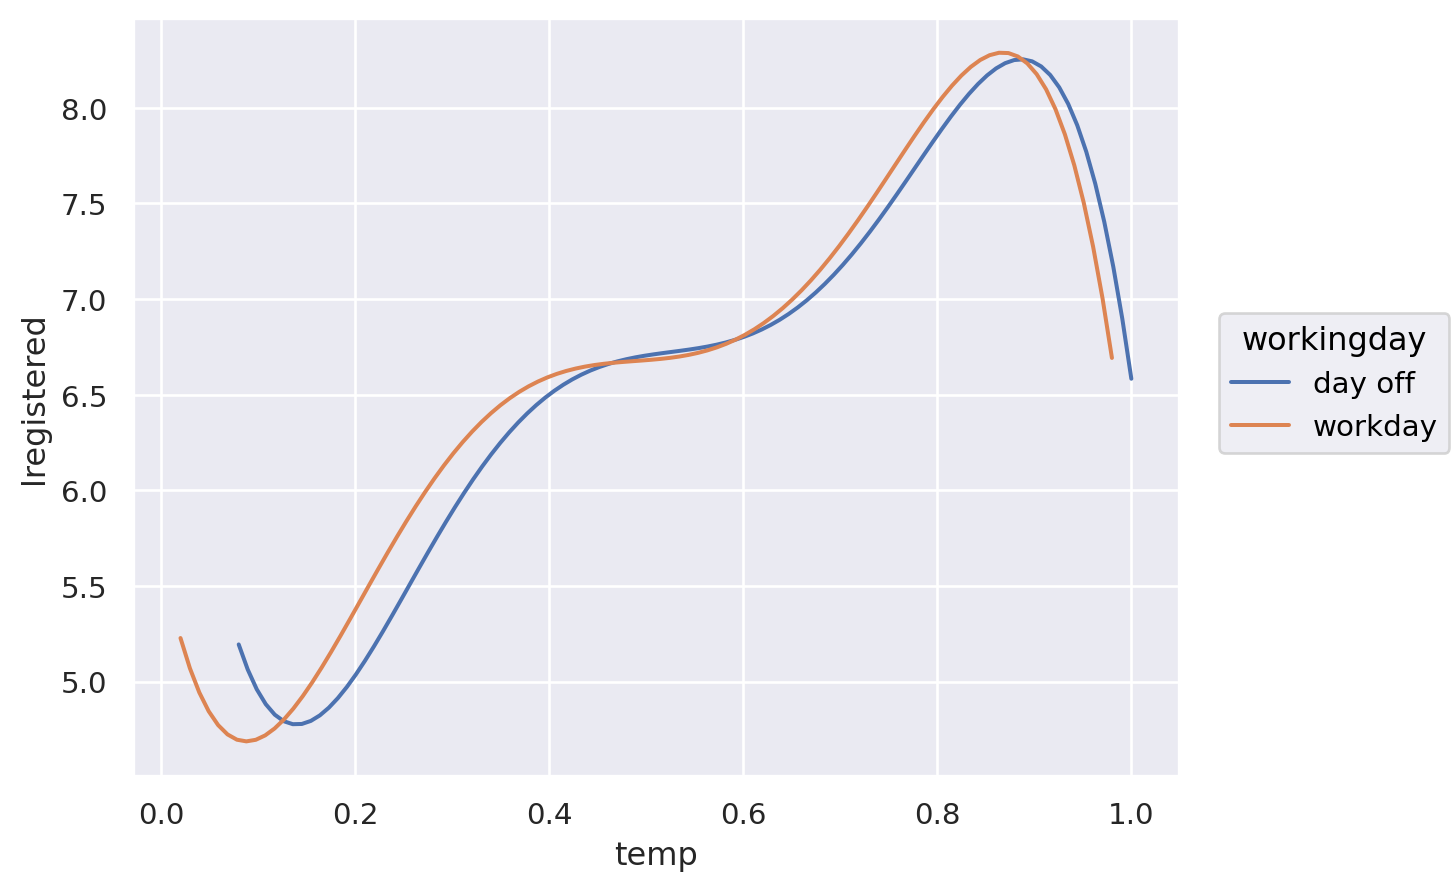

In [170]:
# a.

(
    so.Plot(bikes, x = 'temp', y = 'lregistered', color = 'workingday')
    .add(so.Line(), so.PolyFit(5))
)

In [171]:
# b.
mod_ns2 = smf.ols("lregistered ~ cr(hr, df=10) * workingday + temp + I(temp**2)", data=bikes).fit()

### B-9. (15)

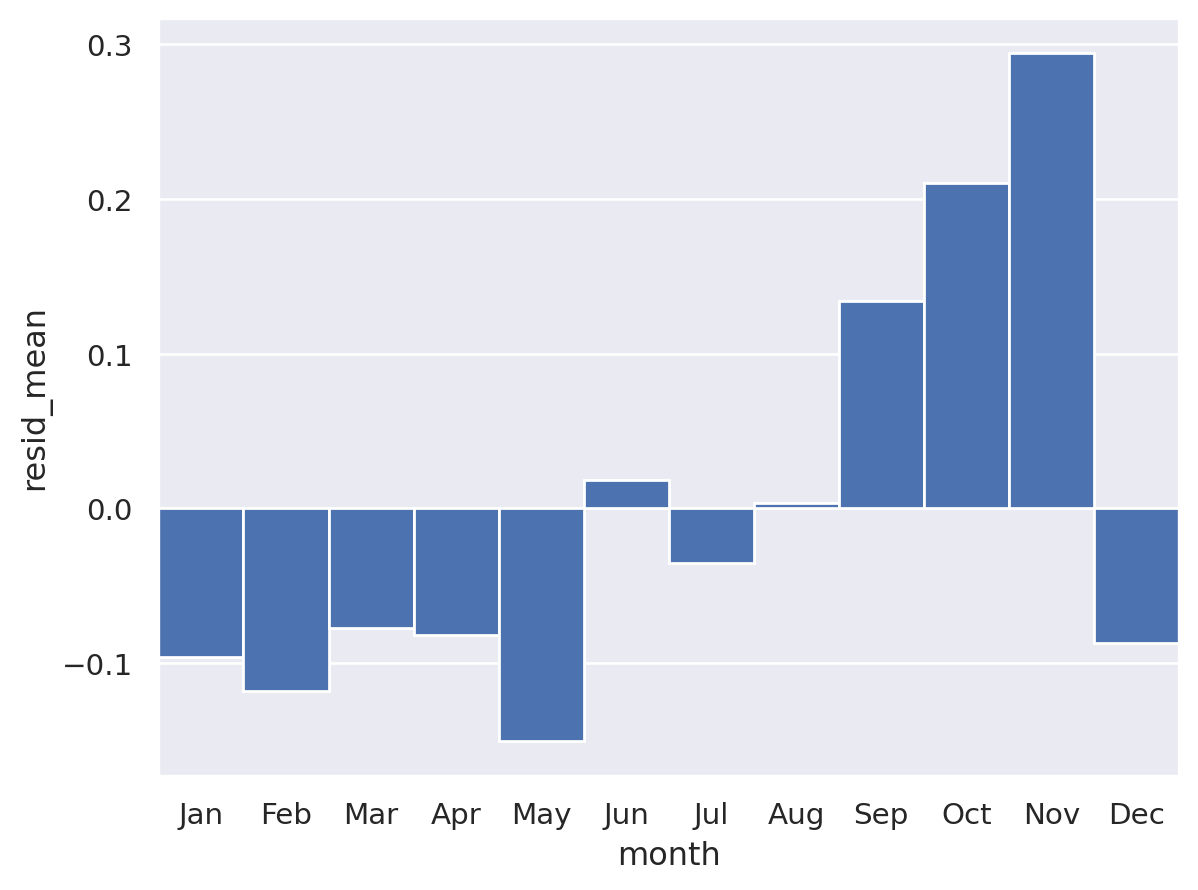

In [172]:
# a.
bikes['resid_ns2'] = mod_ns2.resid

month_resid_mean = bikes.groupby('month')['resid_ns2'].mean().reset_index()

bikes['resid_mean'] = bikes['month'].map(month_resid_mean.set_index('month')['resid_ns2'])

(
    so.Plot(bikes, x = 'month', y = 'resid_mean')
    .add(so.Bars())
)


이 플랏이 의미하는 바를 기술해보세요.

A) 6, 7, 8월은 예측을 잘하고 있지만, 봄, 가을, 겨울에 해당하는 나머지 달들은 잔차 평균이 6~8월에 비해 큰 것을 보아 계절성을 추가해줘야 될 거 같다.

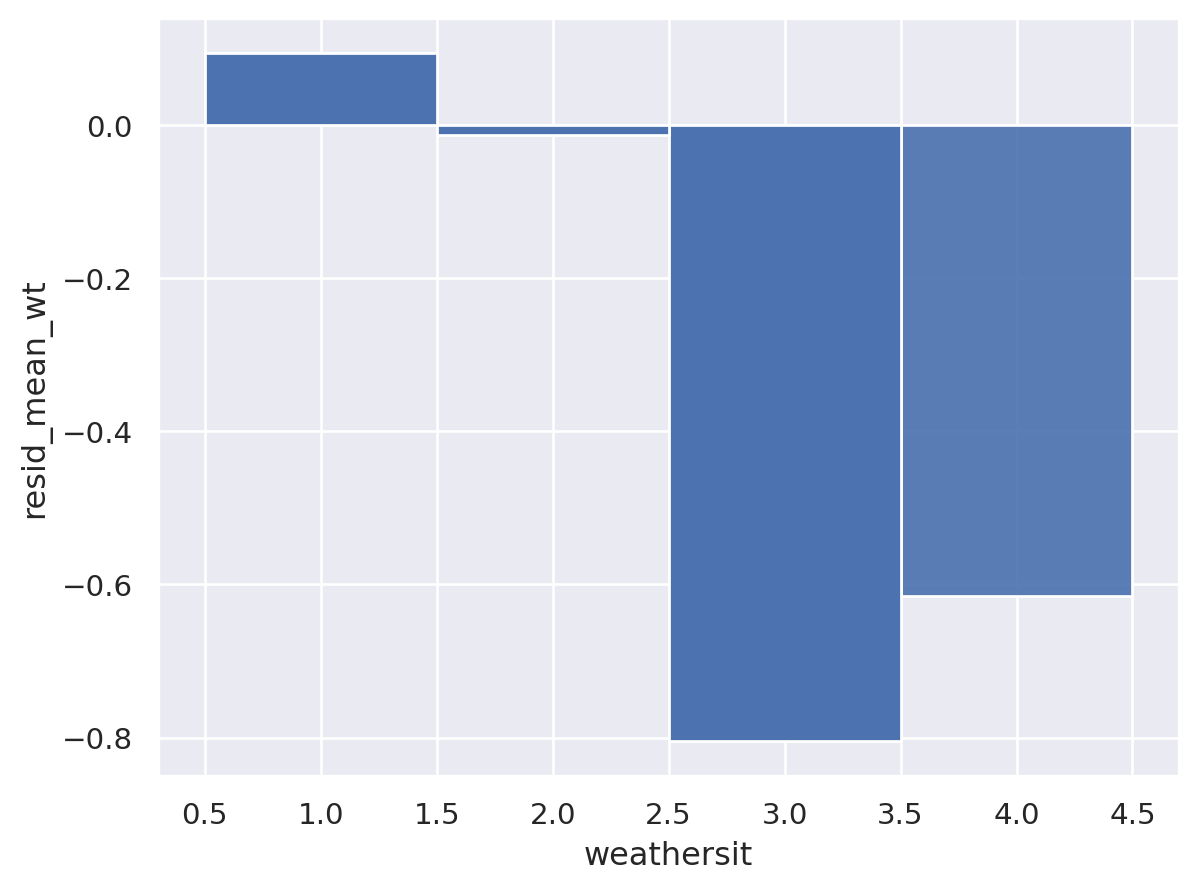

In [173]:
# b.
bikes['resid_ns2'] = mod_ns2.resid

weathersit_resid_mean = bikes.groupby('weathersit')['resid_ns2'].mean().reset_index()

bikes['resid_mean_wt'] = bikes['weathersit'].map(weathersit_resid_mean.set_index('weathersit')['resid_ns2'])

(
    so.Plot(bikes, x = 'weathersit', y = 'resid_mean_wt')
    .add(so.Bars())
)


이 플랏이 의미하는 바를 기술해보세요.

A) 눈이 오고, 비가 오고 등의 자전거 타기 좋지 않은 날씨인 3, 4에 대해서 현재 모델이 예측을 잘 못하고 있다.

### B-10. (10)

In [174]:
# a.
mod1 = smf.ols("lregistered ~ cr(hr, df=10)", data=bikes).fit()
mod2 = smf.ols("lregistered ~ cr(hr, df=10) * workingday", data=bikes).fit()
mod3 = smf.ols("lregistered ~ cr(hr, df=10) * workingday + temp + I(temp**2)", data=bikes).fit()


print(f"R-squared: {mod1.rsquared:.3f}")
print(f"R-squared: {mod2.rsquared:.3f}")
print(f"R-squared: {mod3.rsquared:.3f}")

R-squared: 0.749
R-squared: 0.871
R-squared: 0.908


b. 예측변수의 추가에 따른 $R^2$값의 증가분을 살펴보고, 각 예측변수들의 공헌도에 대해 간략히 기술하세요.

A) workingday는 13퍼 정도 공헌하며, 2차 다항함수로 고려해준 temp는 3퍼 정도 공헌한다.

### B-11. (5)

In [175]:
# a.
mod1 = smf.ols("lcasual ~ cr(hr, df=10)", data=bikes).fit()
mod2 = smf.ols("lcasual ~ cr(hr, df=10) * workingday", data=bikes).fit()
mod3 = smf.ols("lcasual ~ cr(hr, df=10) * workingday + temp + I(temp**2)", data=bikes).fit()


print(f"R-squared: {mod1.rsquared:.3f}")
print(f"R-squared: {mod2.rsquared:.3f}")
print(f"R-squared: {mod3.rsquared:.3f}")


R-squared: 0.619
R-squared: 0.671
R-squared: 0.830


b. 예측변수의 추가에 따른 $R^2$값의 증가분을 살펴보고, 각 예측변수들의 공헌도에 대해 간략히 기술하세요.

A) workingday는 5퍼 정도 공헌하며, 2차 다항함수로 고려해준 temp는 16퍼 정도 공헌한다.

### B-12. (5)

(B-10)과 (B-11)의 결과를 바탕으로 registered bikers와 casual bikers들 간에 자전거 이용에 대해 어떠한 차이점이 있을지 추측해보고, 간략히 기술해보세요.

 A) registered bikers는 자전거를 등록하고, 주기적으로 자전거를 이용하며 출퇴근을 하는 집단으로 추측되는데, 이러한 점에서 workingday가 공헌도가 크다는 것이 이걸 반증해주고 있다. casual bikers의 경우 자전거를 동록하지 않고 여가나 주말, 공휴일 등의 시간에 자전거를 타고 나들이나 마실을 가는 집단으로 추측되는데, 이러한 점에서 temp가 영향력이 높다는 게 이를 반증해주고 있다. 자전거의 사용 목적이 두 집단의 가장 큰 차이인 거 같다.

끝